# Neural networks

In [2]:
%matplotlib inline

In [3]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn import preprocessing
from sklearn.metrics import euclidean_distances
from math import log

In [4]:
sns.set(style='white')

Načtení dat.

In [10]:
d1 = pd.read_csv('data/data1.csv', sep=';', header=None)

n = 13  # number of inputs
input_indices = list(range(n))

dy = d1[n]
dx = d1[input_indices]

dx.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.1165,3.0245,2.3679,3.0083,2.8883,1.8847,2.4943,0.4056,0.8631,0.7774,0.0605,0.4959,0.2765
1,3.3165,3.0245,2.3679,3.0083,2.8883,1.8847,2.4943,0.4056,0.8631,0.7774,0.0605,0.4959,0.2765
2,3.1165,3.2245,2.3679,3.0083,2.8883,1.8847,2.4943,0.4056,0.8631,0.7774,0.0605,0.4959,0.2765
3,3.1165,3.0245,2.3679,3.0083,2.8883,1.8847,2.4943,0.6056,0.8631,0.7774,0.0605,0.4959,0.2765
4,3.1165,3.0245,2.5679,3.0083,2.8883,1.8847,2.4943,0.4056,0.8631,0.7774,0.0605,0.4959,0.2765


## Learning Multilayer Perceptron

Vytvoří novou neuronovou síť s topologii 13-2-1 a natrénuje váhy tak, aby hodnota výstupního neuronu co nejlépe odpovídala funkční hodnotě v daném bodě. Potenciály dvou neuronů ve skryté vrstvě pak slouží jako projekce do 2D. 

In [35]:
# Fix the randomness
tf.set_random_seed(4)

# Parameters
learning_rate = 0.001
training_epochs = 300
batch_size = 1000
display_step = 1

# Network Parameters
n_hidden_1 = 2  # 1st layer number of features
n_input = n  # data input size (13 features)
n_output = 1  # single output value (function value at given point)

# tf Graph input
x = tf.placeholder(tf.float32, shape=(batch_size, n_input))
y = tf.placeholder(tf.float32, shape=(batch_size, n_output))


# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    return out_layer


weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1], seed=23)),
    'out': tf.Variable(tf.random_normal([n_hidden_1, n_output], seed=420))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1], seed=0)),
    'out': tf.Variable(tf.random_normal([n_output], seed=3))
}

# Construct model
pred = multilayer_perceptron(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.log_poisson_loss(pred, y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

result = None
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(len(dx)/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x = dx[batch_size*i:batch_size*(i+1)].values
            batch_y = dy[batch_size*i:batch_size*(i+1)].values[np.newaxis, :].T
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                          y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=",
                  "{:.9f}".format(avg_cost))
    print("Optimization Finished!")
    # save weights of the hidden layer of the trained model
    result = weights['h1'].eval()

Epoch: 0001 cost= 126.312834032
Epoch: 0002 cost= 34.634400360
Epoch: 0003 cost= 15.445241409
Epoch: 0004 cost= 8.342340093
Epoch: 0005 cost= 5.024331948
Epoch: 0006 cost= 3.294488657
Epoch: 0007 cost= 2.331411567
Epoch: 0008 cost= 1.769936707
Epoch: 0009 cost= 1.429640683
Epoch: 0010 cost= 1.214857923
Epoch: 0011 cost= 1.072364198
Epoch: 0012 cost= 0.971584095
Epoch: 0013 cost= 0.894614614
Epoch: 0014 cost= 0.830907444
Epoch: 0015 cost= 0.774178440
Epoch: 0016 cost= 0.720769091
Epoch: 0017 cost= 0.668556124
Epoch: 0018 cost= 0.616334059
Epoch: 0019 cost= 0.563441891
Epoch: 0020 cost= 0.509546717
Epoch: 0021 cost= 0.454506300
Epoch: 0022 cost= 0.398240893
Epoch: 0023 cost= 0.340765839
Epoch: 0024 cost= 0.282087294
Epoch: 0025 cost= 0.222263306
Epoch: 0026 cost= 0.161325914
Epoch: 0027 cost= 0.099337241
Epoch: 0028 cost= 0.036331626
Epoch: 0029 cost= -0.027643110
Epoch: 0030 cost= -0.092537929
Epoch: 0031 cost= -0.158306757
Epoch: 0032 cost= -0.224905074
Epoch: 0033 cost= -0.292302198
E

In [36]:
result

array([[ 0.43577018,  0.57814699],
       [-0.60166079,  0.4303157 ],
       [ 0.17540994,  2.13400054],
       [ 0.19109787, -1.35049975],
       [-0.36412993,  1.14343286],
       [ 1.18457747, -1.30779481],
       [ 1.93211269,  1.87911654],
       [ 0.37017316,  0.79561412],
       [-0.55441463,  0.6412062 ],
       [ 0.6987322 , -0.10976961],
       [-2.4717207 ,  2.08237147],
       [ 0.74341077,  1.98237848],
       [-0.45134008, -0.84802526]], dtype=float32)

In [37]:
d_nn = d1[input_indices]
d_nn['x1'] = dx.dot(result.T[0])
d_nn['x2'] = dx.dot(result.T[1])
d_nn['y'] = dy
d_nn

,0,1,2,3,4,5,6,7,8,9,10,11,12,x1,x2,y
0,3.1165,3.0245,2.3679,3.0083,2.8883,1.8847,2.4943,0.4056,0.8631,0.7774,0.0605,0.4959,0.2765,6.837857,11.283890,745.7500
1,3.3165,3.0245,2.3679,3.0083,2.8883,1.8847,2.4943,0.4056,0.8631,0.7774,0.0605,0.4959,0.2765,6.925011,11.399520,6.8596
2,3.1165,3.2245,2.3679,3.0083,2.8883,1.8847,2.4943,0.4056,0.8631,0.7774,0.0605,0.4959,0.2765,6.717525,11.369953,963.6320
3,3.1165,3.0245,2.3679,3.0083,2.8883,1.8847,2.4943,0.6056,0.8631,0.7774,0.0605,0.4959,0.2765,6.911892,11.443013,16.6728
4,3.1165,3.0245,2.5679,3.0083,2.8883,1.8847,2.4943,0.4056,0.8631,0.7774,0.0605,0.4959,0.2765,6.872939,11.710690,436.2930
5,3.1165,3.0245,2.3679,3.0083,2.8883,1.8847,2.4943,0.4056,1.0631,0.7774,0.0605,0.4959,0.2765,6.726974,11.412132,3.9904
6,3.1165,3.0245,2.3679,3.2083,2.8883,1.8847,2.4943,0.4056,0.8631,0.7774,0.0605,0.4959,0.2765,6.876077,11.013790,948.7190
7,3.1165,3.0245,2.3679,3.0083,2.8883,1.8847,2.4943,0.4056,0.8631,0.9774,0.0605,0.4959,0.2765,6.977604,11.261936,24.2590
8,3.1165,3.0245,2.3679,3.0083,3.0883,1.8847,2.4943,0.4056,0.8631,0.7774,0.0605,0.4959,0.2765,6.765031,11.512577,572.4190
9,3.1165,3.0245,2.3679,3.0083,2.8883,1.8847,2.4943,0.4056,0.8631,0.7774,0.2605,0.4959,0.2765,6.343513,11.700365,3.8646


### Scatter plot

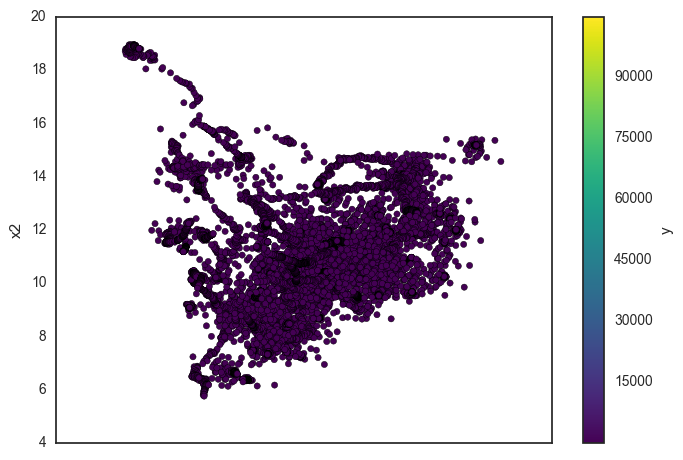

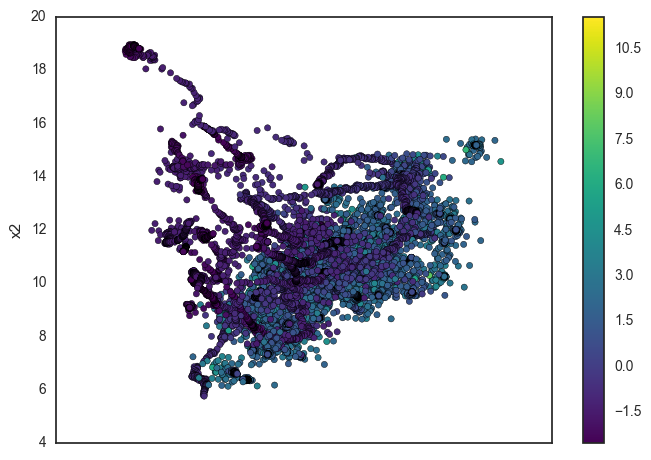

In [38]:
d_nn.plot.scatter(x='x1', y='x2', c='y', cmap='viridis')
d_nn.plot.scatter(x='x1', y='x2', c=d_nn['y'].apply(log), cmap='viridis')

### Hexbin plot

<function __main__.plot_hexbin>

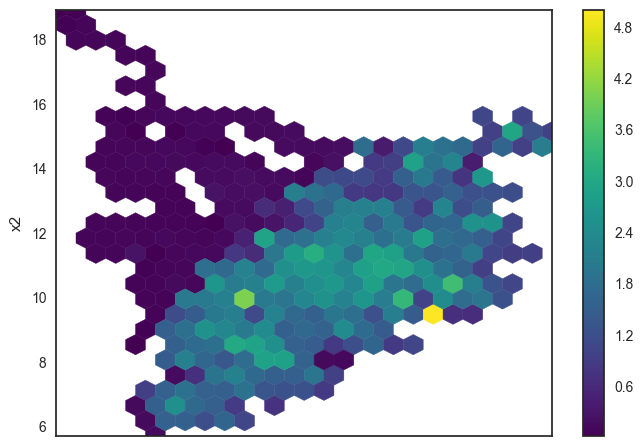

In [39]:
def plot_hexbin(gridsize, logscale, maximum):
    d_nn.plot.hexbin(x='x1', y='x2', C='y',
                       bins='log' if logscale else None,
                       gridsize=gridsize,
                       reduce_C_function=np.max if maximum else np.mean,
                       cmap='viridis')

gridsize = widgets.IntSlider(min=10, max=100, step=5, value=25, description='grid size')
widgets.interact(plot_hexbin, gridsize=gridsize, logscale=True, maximum=True)
# assumes we are intersted in maximization